<a href="https://colab.research.google.com/github/rajesh1789/Assesement/blob/main/Welcome_To_Colab100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn import metrics

In [27]:
df=pd.read_csv("/content/US healthcare data-2 12 2020.csv")

In [4]:
df.shape

(30498, 29)

In [5]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,...,repaglinide,glipizide,insulin,change,diabetesMed,readmitted,age_derived,count_Steady,count_Down,count_Up
0,Caucasian,Female,[0-30),Others,Others,Referral,-1.632460,-0.108475,-3.304858,-0.443669,...,No,No,No,No,No,NO,-2.390913,-0.964053,-0.386999,-0.382050
1,Caucasian,Female,[0-30),Emergency,Discharged to home,Emergency Room,-0.271144,0.808522,0.408817,-0.443669,...,No,No,Up,Ch,Yes,NO,-2.390913,-0.964053,-0.386999,2.617432
2,AfricanAmerican,Female,[0-30),Emergency,Discharged to home,Emergency Room,-0.825587,-1.629615,-0.237590,2.278833,...,No,Steady,No,No,Yes,NO,-2.390913,0.835716,-0.386999,-0.382050
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,-0.825587,0.044197,0.167145,-0.443669,...,No,No,Up,Ch,Yes,NO,-1.716517,-0.964053,-0.386999,2.617432
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,-1.632460,0.400694,-1.082723,-0.443669,...,No,Steady,Steady,Ch,Yes,NO,-1.267255,1.525004,-0.386999,-0.382050


In [6]:
df.tail()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,...,repaglinide,glipizide,insulin,change,diabetesMed,readmitted,age_derived,count_Steady,count_Down,count_Up
30493,AfricanAmerican,Male,[50-60),Emergency,Hospice,Emergency Room,1.852773,0.146017,1.563876,-0.443669,...,No,No,Down,Ch,Yes,<30,-0.753001,-0.964053,2.583969,-0.382050
30494,Caucasian,Male,[60-70),Emergency,Discharged/Transferred,Emergency Room,-0.825587,1.318827,-0.711444,2.278833,...,No,No,Down,Ch,Yes,NO,-0.178500,-0.964053,2.583969,-0.382050
30495,AfricanAmerican,Male,[50-60),Elective,Discharged to home,Referral,-1.632460,-0.311919,1.310901,-0.443669,...,No,No,No,No,Yes,NO,-0.753001,0.835716,-0.386999,-0.382050
30496,Caucasian,Male,[50-60),Emergency,Discharged to home,Emergency Room,0.148889,-0.006702,1.310901,2.226545,...,No,Steady,Steady,Ch,Yes,NO,-0.753001,1.525004,-0.386999,-0.382050
30497,Caucasian,Female,[80-100),Emergency,Discharged to home,Emergency Room,-0.825587,-0.362758,-0.544050,2.226545,...,No,Steady,No,Ch,Yes,NO,1.498830,1.525004,-0.386999,-0.382049


In [8]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glipizide', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'age_derived', 'count_Steady', 'count_Down', 'count_Up'],
      dtype='object')

In [9]:
df.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          8
diag_2                        188
diag_3                        789
number_diagnoses                0
max_glu_serum               26848
A1Cresult                   25127
metformin                       0
repaglinide                     0
glipizide                       0
insulin                         0
change                          0
diabetesMed                     0
readmitted                      0
age_derived                     0
count_Steady                    0
count_Down                      0
count_Up                        0
dtype: int64

In [28]:
df=df.drop('A1Cresult',axis=1)

In [29]:
df=df.drop('max_glu_serum',axis=1)

In [30]:
df=df.drop('race',axis=1)

In [32]:
df.shape

(101766, 26)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    101766 non-null  object 
 1   age                       101766 non-null  object 
 2   admission_type_id         101766 non-null  object 
 3   discharge_disposition_id  101766 non-null  object 
 4   admission_source_id       101766 non-null  object 
 5   time_in_hospital          101766 non-null  float64
 6   num_lab_procedures        101766 non-null  float64
 7   num_medications           101766 non-null  float64
 8   number_outpatient         101766 non-null  float64
 9   number_emergency          101766 non-null  float64
 10  number_inpatient          101766 non-null  float64
 11  diag_1                    101745 non-null  object 
 12  diag_2                    101408 non-null  object 
 13  diag_3                    100343 non-null  o

In [45]:

from sklearn.preprocessing import LabelEncoder

# Assuming your data is in the NumPy array 'df', let's create a DataFrame
# You'll need to adapt this if your data isn't just a single column of genders
df_pd = pd.DataFrame(df, columns=['gender'])

le = LabelEncoder()
df_pd['gender'] = le.fit_transform(df_pd['gender'])
print(df_pd)

        gender
0            0
1            0
2            0
3            1
4            1
...        ...
101761       1
101762       0
101763       1
101764       0
101765       1

[101766 rows x 1 columns]


In [52]:
df_pd['age'] = le.fit_transform(df_pd['age'])

In [54]:
df_pd['admission_type_id'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['admission_type_id'] = le.fit_transform(df_pd['admission_type_id'].astype(str)) # Handle potential missing values as strings for encoding

In [55]:
df_pd['discharge_disposition_id'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['discharge_disposition_id'] = le.fit_transform(df_pd['discharge_disposition_id'].astype(str)) # Handle potential missing values as strings for encoding

In [56]:
df_pd['admission_source_id'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['admission_source_id'] = le.fit_transform(df_pd['admission_source_id'].astype(str)) # Handle potential missing values as strings for encoding

In [58]:
df_pd['diag_1'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['diag_1'] = le.fit_transform(df_pd['diag_1'].astype(str)) # Handle potential missing values as strings for encoding

In [59]:
df_pd['diag_2'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['diag_2'] = le.fit_transform(df_pd['diag_2'].astype(str)) # Handle potential missing values as strings for encoding

In [60]:
df_pd['diag_3'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['diag_3'] = le.fit_transform(df_pd['diag_3'].astype(str)) # Handle potential missing values as strings for encoding

In [61]:
df_pd['metformin'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['metformin'] = le.fit_transform(df_pd['metformin'].astype(str)) # Handle potential missing values as strings for encoding

In [62]:
df_pd['repaglinide'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['repaglinide'] = le.fit_transform(df_pd['repaglinide'].astype(str)) # Handle potential missing values as strings for encoding

In [63]:
df_pd['glipizide'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['glipizide'] = le.fit_transform(df_pd['glipizide'].astype(str)) # Handle potential missing values as strings for encoding

In [64]:
df_pd['insulin'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['insulin'] = le.fit_transform(df_pd['insulin'].astype(str)) # Handle potential missing values as strings for encoding

In [65]:
df_pd['change'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['change'] = le.fit_transform(df_pd['change'].astype(str)) # Handle potential missing values as strings for encoding


In [66]:
df_pd['diabetesMed'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['diabetesMed'] = le.fit_transform(df_pd['diabetesMed'].astype(str)) # Handle potential missing values as strings for encoding

In [67]:
df_pd['readmitted'] = [30, 25, ...] + [None]*(len(df_pd) - 3) # Replace ... with your actual age data and adjust '3' if you provide more initial ages
df_pd['readmitted'] = le.fit_transform(df_pd['readmitted'].astype(str)) # Handle potential missing values as strings for encoding

In [71]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   gender                    101766 non-null  int64
 1   age                       101766 non-null  int64
 2   admission_type_id         101766 non-null  int64
 3   discharge_disposition_id  101766 non-null  int64
 4   admission_source_id       101766 non-null  int64
 5   diag_1                    101766 non-null  int64
 6   diag_2                    101766 non-null  int64
 7   diag_3                    101766 non-null  int64
 8   metformin                 101766 non-null  int64
 9   repaglinide               101766 non-null  int64
 10  glipizide                 101766 non-null  int64
 11  insulin                   101766 non-null  int64
 12  change                    101766 non-null  int64
 13  diabetesMed               101766 non-null  int64
 14  readmitted          

In [72]:
df_pd.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,metformin,repaglinide,glipizide,insulin,change,diabetesMed,readmitted
0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [73]:
df_pd.shape

(101766, 15)

In [74]:
df_pd.isnull().sum()

gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
diag_1                      0
diag_2                      0
diag_3                      0
metformin                   0
repaglinide                 0
glipizide                   0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

<Axes: xlabel='readmitted'>

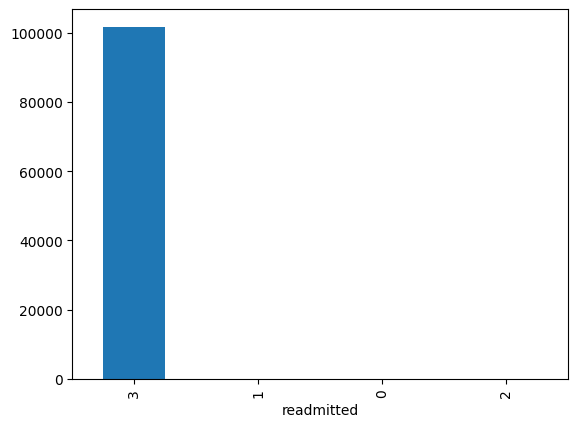

In [113]:
df_pd['readmitted'].value_counts().plot(kind='bar')

In [76]:
df_pd['readmitted'].value_counts()

readmitted
3    101763
1         1
0         1
2         1
Name: count, dtype: int64

In [78]:
X=df_pd.drop('readmitted',axis=1)
y=df_pd['readmitted']

In [80]:
X

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,metformin,repaglinide,glipizide,insulin,change,diabetesMed
0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,3,3,3,3,3,3,3,3,3,3,3,3
101762,0,3,3,3,3,3,3,3,3,3,3,3,3,3
101763,1,3,3,3,3,3,3,3,3,3,3,3,3,3
101764,0,3,3,3,3,3,3,3,3,3,3,3,3,3


In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=20,test_size=0.25)

In [105]:
X_train.shape,X_test.shape,X_train.shape,X_test.shape

((76324, 14), (25442, 14), (76324, 14), (25442, 14))

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report,auc

In [107]:
model_dict={}
model_dict['LogisticRegression']=LogisticRegression(solver='liblinear',random_state=20)
model_dict['DecisionTreeClassifier']=DecisionTreeClassifier(random_state=20)
model_dict['KNeighborsClassifier']=KNeighborsClassifier()
model_dict['RandomForestClassifier']=RandomForestClassifier(random_state=20)
model_dict['AdaBoostClassifier']=AdaBoostClassifier(random_state=20)
model_dict['GradientBoostingClassifier']=GradientBoostingClassifier(random_state=20)

In [108]:
def model_test(X_train,X_test,y_train,y_test,model,model_name):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print('=================================================={}=============================================='.format(model_name))
  print('score is :{}'.format(accuracy))
  print()

In [109]:
for model_name,model in model_dict.items():
  model_test(X_train,X_test,y_train,y_test,model,model_name)

==================================================LogisticRegression==============================================
score is :1.0

==================================================DecisionTreeClassifier==============================================
score is :1.0

==================================================KNeighborsClassifier==============================================
score is :1.0

==================================================RandomForestClassifier==============================================
score is :1.0

==================================================AdaBoostClassifier==============================================
score is :1.0

==================================================GradientBoostingClassifier==============================================
score is :1.0



In [110]:
y_pred=model.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3])